In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/BOAZ Analysis/BOAZ mini project 2

/content/drive/MyDrive/BOAZ Analysis/BOAZ mini project 2


In [3]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 50.1 MB/s eta 0:00:00


In [4]:
!sudo apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
!pip install konlpy
!sudo apt-get install curl git
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:9.3.0-1ubuntu2).
g++ set to manually installed.
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
curl is already the newest version (7.68.0-1ubuntu2.18).
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libgail-common libgail18 libgtk2.0-0
  libgtk2.0-bin libgtk2.0-common libxkbfile1 libxtst6 libxxf86dga1
  openjdk-8-jdk-headless openjdk-8-jre openjdk-8-jre-headless python-pip-whl
  python3-setuptools python3-wheel x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic python-setuptools-doc mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-e

<h1> 1. 크롤링한 데이터 불러오기 </h1>
<li> top_100 : 실시간 TOP 100 순위
<li> 장르별로 곡 100개(댄스와 트로트 제외)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
# 한글만 추출하기
from konlpy.tag import Mecab
from tqdm import tqdm
import pickle

top_100 = pd.read_csv('./data/Melon Top 100.csv').drop('Unnamed: 0', axis = 1)
genre_100 = pd.read_csv('./data/music.csv')
top_100.head()

,제목,가수,가사,장르
0,I AM,IVE (아이브),다른 문을 열어 따라 갈 필요는 없어\n넌 너의 길로 난 나의 길로 음\n하루하루마...,댄스
1,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM (르세라핌),Unforgiven I’m a villain I’m a\nUnforgiven 난 그...,댄스
2,Spicy,aespa,Uh Uh Too Spicy\nYou want my A to the Z\nBut y...,댄스
3,Kitsch,IVE (아이브),It's our time 우린 달라 특별한 게 좋아\nOh What a good t...,댄스
4,퀸카 (Queencard),(여자)아이들,Hey you\n뭘 보니? 내가 좀 Sexy Sexy 반했니\nYe you\n뭐 하...,댄스


In [6]:
genre_100.head()

,genre,song_name,artist,lyric
0,발라드,내 손을 잡아,아이유,느낌이 오잖아\n\n떨리고 있잖아\n\n언제까지 눈치만 볼 거니\n\n네 맘을 말해...
1,발라드,Timeless,SG 워너비,어쩜 살아가다 보면\n한 번은 날 찾을지 몰라\n난 그 기대 하나로\n오늘도 힘겹게...
2,발라드,봄 사랑 벚꽃 말고,"HIGH4 (하이포), 아이유",길었던 겨우내 줄곧 품이 좀 남는\n밤색 코트\n그 속에 나를 쏙 감추고 걸음을\n...
3,발라드,금요일에 만나요 (Feat. 장이정 Of HISTORY),아이유,월요일엔 아마 바쁘지 않을까\n화요일도 성급해 보이지 안 그래\n수요일은 뭔가 어정...
4,발라드,라라라,SG 워너비,그대는 참 아름다워요\n밤 하늘의 별빛보다 빛나요\n지친 나의 마음을 따뜻하게 감싸...


<h1> 2. 데이터 전처리 </h1>
<li> 데이터 형식 맞추기
<li> 데이터 concatenate
<li> Mecab 이용해서 명사, 형용사, 동사만 추출

In [7]:
top_100 = top_100.rename(columns = {'제목' : 'song_name', '가수' : 'artist' , '가사' : 'lyric', '장르' : 'genre'})
top_100.shape, genre_100.shape

((100, 4), (600, 4))

In [8]:
top_100.head()

,song_name,artist,lyric,genre
0,I AM,IVE (아이브),다른 문을 열어 따라 갈 필요는 없어\n넌 너의 길로 난 나의 길로 음\n하루하루마...,댄스
1,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM (르세라핌),Unforgiven I’m a villain I’m a\nUnforgiven 난 그...,댄스
2,Spicy,aespa,Uh Uh Too Spicy\nYou want my A to the Z\nBut y...,댄스
3,Kitsch,IVE (아이브),It's our time 우린 달라 특별한 게 좋아\nOh What a good t...,댄스
4,퀸카 (Queencard),(여자)아이들,Hey you\n뭘 보니? 내가 좀 Sexy Sexy 반했니\nYe you\n뭐 하...,댄스


In [9]:
genre_100.head()

,genre,song_name,artist,lyric
0,발라드,내 손을 잡아,아이유,느낌이 오잖아\n\n떨리고 있잖아\n\n언제까지 눈치만 볼 거니\n\n네 맘을 말해...
1,발라드,Timeless,SG 워너비,어쩜 살아가다 보면\n한 번은 날 찾을지 몰라\n난 그 기대 하나로\n오늘도 힘겹게...
2,발라드,봄 사랑 벚꽃 말고,"HIGH4 (하이포), 아이유",길었던 겨우내 줄곧 품이 좀 남는\n밤색 코트\n그 속에 나를 쏙 감추고 걸음을\n...
3,발라드,금요일에 만나요 (Feat. 장이정 Of HISTORY),아이유,월요일엔 아마 바쁘지 않을까\n화요일도 성급해 보이지 안 그래\n수요일은 뭔가 어정...
4,발라드,라라라,SG 워너비,그대는 참 아름다워요\n밤 하늘의 별빛보다 빛나요\n지친 나의 마음을 따뜻하게 감싸...


In [10]:
melon_data = pd.concat([top_100, genre_100], axis = 0).reset_index(drop = True)
melon_data.head()

,song_name,artist,lyric,genre
0,I AM,IVE (아이브),다른 문을 열어 따라 갈 필요는 없어\n넌 너의 길로 난 나의 길로 음\n하루하루마...,댄스
1,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM (르세라핌),Unforgiven I’m a villain I’m a\nUnforgiven 난 그...,댄스
2,Spicy,aespa,Uh Uh Too Spicy\nYou want my A to the Z\nBut y...,댄스
3,Kitsch,IVE (아이브),It's our time 우린 달라 특별한 게 좋아\nOh What a good t...,댄스
4,퀸카 (Queencard),(여자)아이들,Hey you\n뭘 보니? 내가 좀 Sexy Sexy 반했니\nYe you\n뭐 하...,댄스


In [ ]:
melon_data.to_excel('melon_crawling_0524.xlsx', index = False, encoding = 'CP949')

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)


In [47]:
melon_data = pd.read_csv('After_sentiment_0530 for lyric summary.csv', encoding = 'CP949')
melon_data['lyric_summary2'][0].replace(' ', '')

'장르음으로판타지내일내게열리는아름다운갤럭시장르로는판타지내일내게열리는걸스테이지장르로는판타지내일내게열리는건스테이지장르로는판타지내일내게열리는건스테이지'

In [48]:
def hangul_only(df : pd.DataFrame, convert_column : str) -> pd.DataFrame:
    df['sentence'] = df[convert_column].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]","")
    df['sentence'] = df['sentence'].replace('^ +', '')
    df['sentence'].replace('', np.nan, inplace = True)
    df = df.dropna(how = 'any')
    return df

# 형태소 분석 -> mecab 이용해서 명사, 형용사, 동사만 추출
def mecab_preprocessing(df : pd.DataFrame, convert_column : str) -> pd.DataFrame:
    tags = ['JK', 'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 'JX', 'JC', 'EP', 'EF', 'EC', 'ETN', 'ETM']


    mecab = Mecab()

    for idx, row in tqdm(df.iterrows(), desc = 'removing josa', total = len(df)):
        josa_removed = [x[0] for x in mecab.pos(row['sentence']) if x[1] not in tags]
        df.loc[idx, 'preprocessed_sentence'] = ' '.join(josa_removed)
    
    return df

# 데이터 간소화 하기 (필요한 것만 불러오기)
def get_data_only_review(df : pd.DataFrame) -> pd.DataFrame:
    return df[['sentence', 'preprocessed_sentence', 'label']]


In [49]:
melon_hangul = hangul_only(melon_data, 'lyric')
melon_mecab = mecab_preprocessing(melon_hangul, 'sentence')
melon_mecab.head()

<ipython-input-48-c7ef39891176>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['sentence'] = df[convert_column].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]","")
removing josa: 100%|██████████| 622/622 [00:00<00:00, 850.08it/s]


,Column1,song_name,artist,lyric,genre,sentence,lyric_summary,lyric_summary2,preprocessed_sentence,score_summary_1,score_summary_2
0,0,I AM,IVE (아이브),다른 문을 열어 따라 갈 필요는 없어\n넌 너의 길로 난 나의 길로 음\n하루하루마...,댄스,다른 문을 열어 따라 갈 필요는 없어넌 너의 길로 난 나의 길로 음하루하루마다 색이...,장르음으로 판타지내일 내게 열리는 아름다운 갤럭시 장르로는 판타지내일 내게 열리는...,장르음으로 판타지내일 내게 열리는 아름다운 갤럭시 장르로는 판타지내일 내게 열리는...,다른 문 열 따라 갈 필요 없 넌 너 길 난 나 길 음 하루하루 색 달라진 느낌 밝...,0.664169,0.664169
1,1,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM (르세라핌),Unforgiven I’m a villain I’m a\nUnforgiven 난 그...,댄스,난 그 길을 걸어 새 시대로 기억될 불편함이 깃든 사...,"자유소한 적도 없고 바란 적도 없었 용서 따위는 난 금기를 겨눠, 새 시대로 기억될...","자유소한 적도 없고 바란 적도 없었 용서 따위는 난 금기를 겨눠, 새 시대로 기억될...",난 그 길 걸 새 시대 기억 될 불편 함 깃든 사냥감 거듭 해 찾 워리 어 너 에 ...,92.852813,97.671276
2,2,Spicy,aespa,Uh Uh Too Spicy\nYou want my A to the Z\nBut y...,댄스,어림없지맞혀봐 또는 망설이듯 간 보는 너기회는 없어 ...,리지 않고 넌지금 이 순간또 다른 나를 발견하고 그 순간또 다른 나를 향해 넌 번...,리지 않고 넌지금 이 순간또 다른 나를 발견하고 그 순간또 다른 나를 향해 넌 번...,어림없 맞혀 봐 또는 망설 듯 보 너 기회 없 깜빡 한 순간 끌어당겨 살짝 다가와 ...,0.344932,0.344932
3,3,Kitsch,IVE (아이브),It's our time 우린 달라 특별한 게 좋아\nOh What a good t...,댄스,우린 달라 특별한 게 좋아 난 잘 살아 내 걱정은 낭비야네가 보낸 을 읽...,"이우리만의 자유로운 이 이며, 우리우리만의 자유로운 이 이글글글글글글글로 나의 ...","이우리만의 자유로운 이 이며, 우리우리만의 자유로운 이 이글글글글글글글로 나의 ...",우린 달라 특별 한 게 좋 난 잘 살 내 걱정 낭비 야 네 보낸 읽 나 답 없 게 ...,95.666677,95.666677
4,4,퀸카 (Queencard),(여자)아이들,Hey you\n뭘 보니? 내가 좀 Sexy Sexy 반했니\nYe you\n뭐 하...,댄스,뭘 보니 내가 좀 반했니 뭐 하니 너도 내 원하니월 화 수 목 금 토 일 ...,카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카...,카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카...,뭘 보 내 좀 반했 뭐 하 너 내 원 하 월 화 수 목 금 토 일 미모 쉬 않 머리...,80.484235,80.484235


<h2> 학습시켰던 tokenizer 모델 불러오기 </h2>
<li> 네이버 영화 리뷰 200,000개, 네이버 쇼핑 리뷰 200,000개 기반으로 토크나이저 학습 

In [50]:
# loading => 토크나이저 모델 불러오기
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

# 학습시킨 토크나이저 모델을 이용하여 멜론 노래 토크나이징
song_token = []
for sentence in tqdm(melon_mecab['preprocessed_sentence']):
    tokenized_sentence = str(sentence).split(' ')
    song_token.append(tokenized_sentence)

# 멜론 노래 토크나이징 최종 결과
song_sequences = tokenizer.texts_to_sequences(song_token)
print('\ntokenize 결과 -> 총 개수 : {}'.format(len(song_sequences)))
print('첫 번째 노래의 tokenizing 결과 : {}'.format(song_sequences[0]))
print('열 번째 노래의 tokenizing 개수 : {}'.format(len(song_sequences[10])))

# 노래 길이가 너무 짧은 것은 제거
drop_index = [index for index, sentence in enumerate(song_sequences) if len(sentence) < 3]
song_array = np.delete(song_sequences, drop_index, axis = 0)
print('제거하고 난 후의 노래 변화 : {}'.format(len(song_array)))

100%|██████████| 622/622 [00:00<00:00, 39368.87it/s]


tokenize 결과 -> 총 개수 : 622
첫 번째 노래의 tokenizing 결과 : [83, 694, 527, 1080, 662, 217, 13, 2722, 631, 155, 250, 26, 155, 428, 7890, 263, 5088, 110, 1001, 1173, 26, 155, 330, 2722, 34, 245, 895, 243, 476, 291, 631, 73980, 369, 2, 722, 269, 25091, 11870, 2891, 4537, 7431, 5632, 664, 5745, 984, 1220, 2162, 4072, 2755, 113, 38192, 1282, 111, 83, 4252, 5, 26, 17676, 406, 41, 2987, 211, 6662, 5, 113, 21, 27482, 5621, 2722, 34, 245, 895, 243, 476, 291, 631, 73980, 369, 2, 722, 269, 25091, 11870, 2891, 4537, 7431, 5632, 664, 5745, 984, 1220, 2162, 4072, 2755, 113, 38192, 722, 754, 837, 155, 1240, 524, 67110, 1291, 230, 303, 649, 1306, 155, 16190, 67, 90, 5213, 90, 5213, 90, 120, 369, 2, 722, 269, 25091, 11870, 2891, 4537, 7431, 5632, 664, 5745, 984, 1220, 2162, 4072, 2755, 113, 38192]
열 번째 노래의 tokenizing 개수 : 143
제거하고 난 후의 노래 변화 : 605



/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5030: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


<h2> 노래의 평균 길이와 최대 길이 비교 </h2>
기존의 tokenizing에서 평균이 12고 최대가 83인 것을 고려했을 때, 텍스트 요약이 필요

노래의 최대 길이 : 1852
노래의 최소 길이 : 4
노래의 평균 길이 : 516.2893890675241


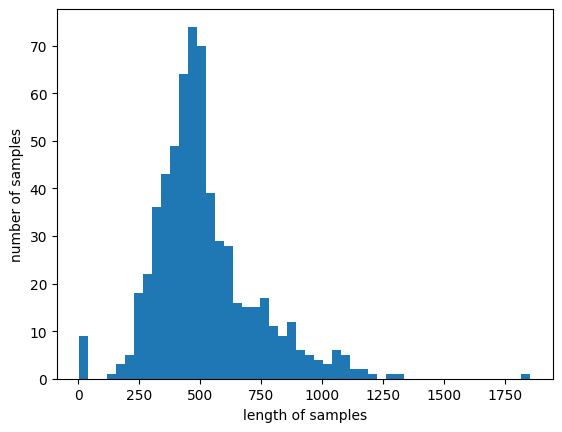

In [51]:
print('노래의 최대 길이 :',max(len(song) for song in melon_mecab['sentence']))
print('노래의 최소 길이 :',min(len(song) for song in melon_mecab['sentence']))
print('노래의 평균 길이 :',sum(map(len, melon_mecab['sentence']))/len(melon_mecab['sentence']))
plt.hist([len(song) for song in melon_mecab['sentence']], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

노래의 최대 길이 : 587
노래의 최소 길이 : 30
노래의 평균 길이 : 180.1818181818182


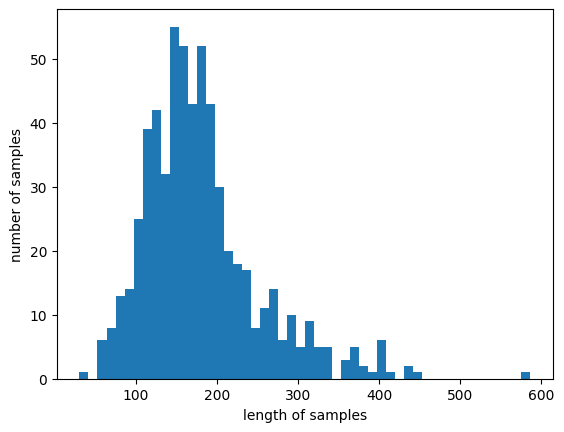

In [52]:
print('노래의 최대 길이 :',max(len(song) for song in song_array))
print('노래의 최소 길이 :',min(len(song) for song in song_array))
print('노래의 평균 길이 :',sum(map(len, song_array))/len(song_array))
plt.hist([len(song) for song in song_array], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [53]:
final_melon = melon_mecab.drop(drop_index, axis = 0).reset_index(drop = True)
final_melon

,Column1,song_name,artist,lyric,genre,sentence,lyric_summary,lyric_summary2,preprocessed_sentence,score_summary_1,score_summary_2
0,0,I AM,IVE (아이브),다른 문을 열어 따라 갈 필요는 없어\n넌 너의 길로 난 나의 길로 음\n하루하루마...,댄스,다른 문을 열어 따라 갈 필요는 없어넌 너의 길로 난 나의 길로 음하루하루마다 색이...,장르음으로 판타지내일 내게 열리는 아름다운 갤럭시 장르로는 판타지내일 내게 열리는...,장르음으로 판타지내일 내게 열리는 아름다운 갤럭시 장르로는 판타지내일 내게 열리는...,다른 문 열 따라 갈 필요 없 넌 너 길 난 나 길 음 하루하루 색 달라진 느낌 밝...,0.664169,0.664169
1,1,UNFORGIVEN (feat. Nile Rodgers),LE SSERAFIM (르세라핌),Unforgiven I’m a villain I’m a\nUnforgiven 난 그...,댄스,난 그 길을 걸어 새 시대로 기억될 불편함이 깃든 사...,"자유소한 적도 없고 바란 적도 없었 용서 따위는 난 금기를 겨눠, 새 시대로 기억될...","자유소한 적도 없고 바란 적도 없었 용서 따위는 난 금기를 겨눠, 새 시대로 기억될...",난 그 길 걸 새 시대 기억 될 불편 함 깃든 사냥감 거듭 해 찾 워리 어 너 에 ...,92.852813,97.671276
2,2,Spicy,aespa,Uh Uh Too Spicy\nYou want my A to the Z\nBut y...,댄스,어림없지맞혀봐 또는 망설이듯 간 보는 너기회는 없어 ...,리지 않고 넌지금 이 순간또 다른 나를 발견하고 그 순간또 다른 나를 향해 넌 번...,리지 않고 넌지금 이 순간또 다른 나를 발견하고 그 순간또 다른 나를 향해 넌 번...,어림없 맞혀 봐 또는 망설 듯 보 너 기회 없 깜빡 한 순간 끌어당겨 살짝 다가와 ...,0.344932,0.344932
3,3,Kitsch,IVE (아이브),It's our time 우린 달라 특별한 게 좋아\nOh What a good t...,댄스,우린 달라 특별한 게 좋아 난 잘 살아 내 걱정은 낭비야네가 보낸 을 읽...,"이우리만의 자유로운 이 이며, 우리우리만의 자유로운 이 이글글글글글글글로 나의 ...","이우리만의 자유로운 이 이며, 우리우리만의 자유로운 이 이글글글글글글글로 나의 ...",우린 달라 특별 한 게 좋 난 잘 살 내 걱정 낭비 야 네 보낸 읽 나 답 없 게 ...,95.666677,95.666677
4,4,퀸카 (Queencard),(여자)아이들,Hey you\n뭘 보니? 내가 좀 Sexy Sexy 반했니\nYe you\n뭐 하...,댄스,뭘 보니 내가 좀 반했니 뭐 하니 너도 내 원하니월 화 수 목 금 토 일 ...,카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카...,카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카카...,뭘 보 내 좀 반했 뭐 하 너 내 원 하 월 화 수 목 금 토 일 미모 쉬 않 머리...,80.484235,80.484235
...,...,...,...,...,...,...,...,...,...,...,...
600,695,2 Years Apart,에디킴,못 참겠어 제대하고 만나고 싶은데\n휴가 때마다 널 꼬시는 걸\n기다려줘 그 동안은...,포크/블루스,못 참겠어 제대하고 만나고 싶은데휴가 때마다 널 꼬시는 걸기다려줘 그 동안은 남자 ...,제대하고 만나고 싶은데휴가 때마다 널 꼬시는 걸기다려줘 그동안은 남자 만나도 돼대신...,제대하고 만나고 싶은데휴가 때마다 널 꼬시는 걸기다려줘 그동안은 남자 만나도 돼대신...,못 참 제대 하 만나 싶 휴가 때 널 꼬시 걸 기다려줘 그 동안 남자 나 돼 대신 ...,0.228428,0.228428
601,696,잘 알지도 못하면서,림킴 (김예림),잘 알지도 못 하면서\n다 알지도 못 하면서\n왜 매번 날 다그치기만 해\n내가 아...,포크/블루스,잘 알지도 못 하면서다 알지도 못 하면서왜 매번 날 다그치기만 해내가 아닌 날 말하...,길길 잃은 어린 소녀의 노래익숙해진 두려움과몸에 배인 침묵 속에외로움도 무뎌져만 가...,길길 잃은 어린 소녀의 노래익숙해진 두려움과몸에 배인 침묵 속에외로움도 무뎌져만 가...,잘 알 못 하 다 알 못 하 왜 매번 날 다그치 해내 아닌 날 말 하 내 없 진실 ...,50.519675,50.519675
602,697,광야에서,김광석,찢기는 가슴 안고 사라졌던\n이 땅에 피울음 있다\n부둥킨 두 팔에 솟아나는\n하얀...,포크/블루스,찢기는 가슴 안고 사라졌던이 땅에 피울음 있다부둥킨 두 팔에 솟아나는하얀 옷에 핏줄...,부추 하리오리오우리 어찌 주저 하리오리오우리 어찌 주저 하리오리오우리 어찌 가난 하...,부추 하리오리오우리 어찌 주저 하리오리오우리 어찌 주저 하리오리오우리 어찌 가난 하...,찢기 가슴 안 사라졌 이 땅 피울 음 있 부둥킨 두 팔 솟아나 하얀 옷 핏줄기 있 ...,96.787453,96.787453
603,698,예뻐서 그래,스탠딩 에그,이미 알고 있는데\n너는 아닌 척을 해\n시선을 피해 항상 나보다 늦게\n먼저 말해...,포크/블루스,이미 알고 있는데너는 아닌 척을 해시선을 피해 항상 나보다 늦게먼저 말해봐 내가 안...,아너는 아닌 척을 해시선을 피해 내가 안아줄게그때가 언제일까 까마득해기다리고 있다는...,아너는 아닌 척을 해시선을 피해 내가 안아줄게그때가 언제일까 까마득해기다리고 있다는...,이미 알 있 너 아닌 척 해 시선 피해 항상 나 늦 먼저 말 해 봐 내 안 아 줄게...,11.715423,11.715423


In [54]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

pad_song = pad_sequences(song_array, maxlen = 83)
pad_song.shape

(605, 83)

<h1> 3. 감정분석 모델로 노래에 대해서 예측하기 </h1>

In [55]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.experimental import CosineDecay


# Define a simple sequential model
def create_model():
    embedding_dim = 128
    hidden_units = 128

    model = Sequential()
    model.add(Embedding(17546, embedding_dim))
    model.add(LSTM(hidden_units))
    model.add(Dense(128, activation = LeakyReLU(alpha = 0.05)))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = LeakyReLU(alpha = 0.05)))
    model.add(Dense(1, activation='sigmoid'))

    return model

# 모델 불러오기
sentiment_model = create_model()
sentiment_model.load_weights('sentiment_model.h5')

In [56]:
predict_score_list = []

for sen in pad_song:
    predict_score = float(sentiment_model.predict(sen.reshape(1, -1)))
    predict_score_list.append(predict_score * 100)

1/1 [==============================] - 0s 21ms/step


In [57]:
final_melon['score_lyrics'] = predict_score_list
final_melon.to_csv('After_sentiment_0530 for lyric summary.csv', index = False, encoding = 'CP949')

<Axes: xlabel='score_summary_2', ylabel='Count'>

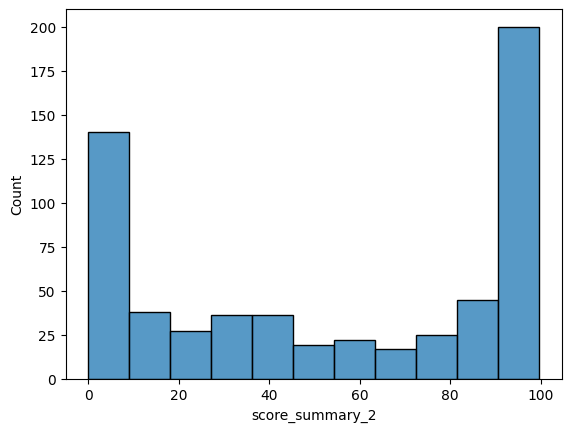

In [62]:
sns.histplot(x = final_melon['score_summary_2'])

<h1> 4. 사용자의 input 들어오는 경우를 가정하기 </h1>

In [76]:
import pickle
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def hangul_only(sentence):
    hangul_sentence = sentence.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]","")
    hangul_sentence = hangul_sentence.replace('^ +', '')
    return hangul_sentence

# 형태소 분석 -> mecab 이용해서 명사, 형용사, 동사만 추출
def mecab_preprocessing(input_sentence):
    hangul_sentence = hangul_only(input_sentence)

    tags = ['JK', 'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ', 'JX', 'JC', 'EP', 'EF', 'EC', 'ETN', 'ETM']


    mecab = Mecab()
    josa_removed = [x[0] for x in mecab.pos(hangul_sentence) if x[1] not in tags]
    preprocessed_sentence = ' '.join(josa_removed)
    
    return preprocessed_sentence

def sentence_to_vector(tokenizer, input_sentence):

    preprocessed_sentence = mecab_preprocessing(input_sentence)

    song_token = []
    tokenized_sentence = str(preprocessed_sentence).split(' ')
    song_token.append(tokenized_sentence)

    song_sequences = tokenizer.texts_to_sequences(song_token)


    print('문장의 tokening 결과 : {}'.format(song_sequences))
    print('문장의 token 개수 : {}'.format(len(song_sequences[0])))

    from tensorflow.keras.preprocessing.sequence import pad_sequences
    pad_song = pad_sequences(song_sequences, maxlen = 83)
    print('문장의 padding 결과 : {}'.format(pad_song))
    print('padding 결과 문장의 token 개수 : {}'.format(len(pad_song)))

    return pad_song

def prediction(sentiment_model, pad_sequences):
    prediction_score= float(sentiment_model.predict(pad_sequences.reshape(1, -1))) * 100
    return prediction_score

def recommend_lyrics(df : pd.DataFrame, column, sentiment_score : float):
    reco_df = df[(df[column] >= sentiment_score - 10) & (df[column] <= sentiment_score + 10)]
    
    return reco_df

def get_similar_songs(df : pd.DataFrame, input_sequence, cosine_sim=cosine_sim):
    appended_list = df.append({'song_name': input_sequence, 'artist': 0, 'lyric':0, 'genre':0, 'sentence':0,
                                    'lyric_summary': input_sequence, 'lyric_summary2':0, 'preprocessed_sentence':0, 
                                    'score_summary_1': 0, 'score_summary_2':0}, ignore_index=True)
    tfidf = TfidfVectorizer()
    tfidf_matrix = tfidf.fit_transform(appended_list['lyric_summary'])
    # compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    indices = pd.Series(appended_list.index, index=appended_list['song_name']).drop_duplicates()

    # get index from selected song
    idx = indices[title]
    
    # get cosine similarity
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # sort songs using cosine similarity values
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # get fice songs from sim_scores list
    sim_scores = sim_scores[1:6]
    
    # get five songs' index number from song list
    song_indices = [i[0] for i in sim_scores]
    
    # return songs
    for i in range(5):
        if i==5:
            break
        print('{}번째 추천 곡은 {}의 {}입니다.'.format(i+1, appended_list['artist'].iloc[song_indices],
                                             appended_list['song_name'].iloc[song_indices])) 
  
        
        
# loading => 토크나이저 모델 불러오기
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

trial = 0
while trial < 2:
    input_sentence = input()
    pad_sequences = sentence_to_vector(tokenizer, input_sentence)
    prediction_score = prediction(sentiment_model, pad_sequences)

    if prediction_score >= 50:
        print('{:.2f} % 확률로 긍정 리뷰입니다.'.format(prediction_score))
        print('추천되는 노래는 \n')
        get_similar_songs(recommend_lyrics(final_melon, 'score_summary_1', prediction_score), input_sequence)
        print()
    else:
        print('{:.2f} % 확률로 부정 리뷰입니다.'.format(100 - prediction_score))
        print('추천되는 노래는 \n')
        get_similar_songs(recommend_lyrics(final_melon, 'score_summary_1', prediction_score), input_sequence)
        print()
    trial += 1

# 요즘 시험기간이라 조금 힘든데 공부할 것은 많고 팀플도 너무 많고 어떻게 해야 할 지 모르겠어. 아 빨리 종강 왔으면 좋겠는데 종강 2주나 남아서 언제까지 기다리냐 너무너무너무 힘들다. 노래 추천해봐
# 보아즈에는 정말 좋은 사람이 많아. 뭐 우리 미니 플젝 팀원은 물론이지. 벌써 6개월이 지났다는 것이 믿기지가 않는데 남은 기간동안 화이팅하자 ㅎㅎ 


보아즈에는 정말 좋은 사람이 많아. 뭐 우리 미니 플젝 팀원은 물론이지. 벌써 6개월이 지났다는 것이 믿기지가 않는데 남은 기간동안 화이팅하자 ㅎㅎ 
문장의 tokening 결과 : [[29, 2, 91, 96, 99, 248, 593, 1411, 11503, 18544, 1077, 4, 798, 466, 1096, 1990, 19, 3856, 20, 98, 149, 1250, 590, 1422, 1, 109]]
문장의 token 개수 : 26
문장의 padding 결과 : [[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0    29     2    91
     96    99   248   593  1411 11503 18544  1077     4   798   466  1096
   1990    19  3856    20    98   149  1250   590  1422     1   109]]
padding 결과 문장의 token 개수 : 1
1/1 [==============================] - 0s 27ms/step


<ipython-input-76-5e1094cdbf00>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df['difference'] = np.abs(reco_df[column] - sentiment_score)


96.59 % 확률로 긍정 리뷰입니다.
추천되는 노래는 

1번째 추천 곡은 LE SSERAFIM (르세라핌)의 UNFORGIVEN (feat. Nile Rodgers)입니다.
2번째 추천 곡은 IVE (아이브)의 Kitsch입니다.
3번째 추천 곡은 임영웅의 사랑은 늘 도망가입니다.
4번째 추천 곡은 임영웅의 우리들의 블루스입니다.
5번째 추천 곡은 임영웅의 Polaroid입니다.

요즘 시험기간이라 조금 힘든데 공부할 것은 많고 팀플도 너무 많고 어떻게 해야 할 지 모르겠어. 아 빨리 종강 왔으면 좋겠는데 종강 2주나 남아서 언제까지 기다리냐 너무너무너무 힘들다. 노래 추천해봐
문장의 tokening 결과 : [[427, 3417, 1250, 4, 144, 5407, 1692, 38, 19, 96, 2757, 1411, 10, 96, 401, 231, 38, 112, 136, 352, 87, 2, 90, 22, 149, 720, 1158, 536, 10, 307, 613, 182, 27, 573]]
문장의 token 개수 : 34
문장의 padding 결과 : [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0  427 3417 1250    4  144 5407 1692
    38   19   96 2757 1411   10   96  401  231   38  112  136  352   87
     2   90   22  149  720 1158  536   10  307  613  182   27  573]]
padding 결과 문장의 token 개수 

<ipython-input-76-5e1094cdbf00>:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reco_df['difference'] = np.abs(reco_df[column] - sentiment_score)
